In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/home/purzelrakete/src/github.com


In [2]:
from pathlib import Path
import os
import pprint

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import IPython.display as ipd

from wavenet import model, train, sample, audio, datasets, utils, viz, debug

In [3]:
pp = pprint.PrettyPrinter(indent=2)

# Train on Dataset in a folder

In [4]:
# this cell contains papermill tagged parameters
# they can be overriden by the cli when training:  
# papermill in.ipynb out.ipynb -p batch_norm True

batch_norm = False
learning_rate = 0.0044
finder = False
batch_size = 12
max_epochs = 2
with_all_chans = None
root_dir = None
cache_dir = None

In [5]:
# Parameters
root_dir = "/srv/datasets/goldberg/aria"
cache_dir = "/srv/datasets-ssd/goldberg/aria"
learning_rate = 0.0026
with_all_chans = 256
max_epochs = 75


In [6]:
p = model.HParams(
    embed_inputs=True, 
    n_audio_chans=1, 
    squash_to_mono=True,
    batch_norm=batch_norm
)

if with_all_chans:
    p = p.with_all_chans(with_all_chans)

pp.pprint(dict(p))

{ 'batch_norm': False,
  'compress': True,
  'dilation_stacks': 3,
  'embed_inputs': True,
  'kernel_size': 2,
  'mixed_precision': True,
  'n_audio_chans': 1,
  'n_chans': 256,
  'n_chans_embed': 256,
  'n_chans_end': 256,
  'n_chans_res': 256,
  'n_chans_skip': 256,
  'n_classes': 256,
  'n_layers': 11,
  'resample': True,
  'resampling_method': 'soxr_hq',
  'sample_from_gpu': True,
  'sample_hop_length': 16000,
  'sample_length': 16000,
  'sampling_rate': 16000,
  'seed': 5763,
  'squash_to_mono': True,
  'use_deterministic_algorithms': False}


In [7]:
tp = train.HParams(
    max_epochs=max_epochs, 
    batch_size=batch_size, 
    num_workers=8, 
    finder=finder, 
    learning_rate=learning_rate
)

pp.pprint(dict(tp))

{ 'batch_size': 12,
  'betas': (0.9, 0.95),
  'callback_fq': 8,
  'finder': False,
  'grad_norm_clip': None,
  'learning_rate': 0.0026,
  'max_epochs': 75,
  'num_workers': 8,
  'onecycle': True,
  'project_name': 'feldberlin-wavenet'}


In [8]:
utils.seed(p)
ds_train = datasets.Tracks.from_dir(p, Path(root_dir), Path(cache_dir) if cache_dir else None)
ds_train

Tracks(/srv/datasets/goldberg/aria)

In [9]:
n_examples = len(ds_train)
n_steps = tp.n_steps(n_examples)
n_examples, n_steps

(299, 1875)

In [10]:
utils.seed(p)
m = model.Wavenet(p)
debug.summarize(m)

+--------------------------+------------+
|         Modules          | Parameters |
+--------------------------+------------+
|       embed.weight       |   65536    |
|      shifted.weight      |   131072   |
|       shifted.bias       |    256     |
|   layers.0.conv.weight   |   262144   |
|    layers.0.conv.bias    |    512     |
|  layers.0.res1x1.weight  |   65536    |
|   layers.0.res1x1.bias   |    256     |
| layers.0.skip1x1.weight  |   65536    |
|  layers.0.skip1x1.bias   |    256     |
|   layers.1.conv.weight   |   262144   |
|    layers.1.conv.bias    |    512     |
|  layers.1.res1x1.weight  |   65536    |
|   layers.1.res1x1.bias   |    256     |
| layers.1.skip1x1.weight  |   65536    |
|  layers.1.skip1x1.bias   |    256     |
|   layers.2.conv.weight   |   262144   |
|    layers.2.conv.bias    |    512     |
|  layers.2.res1x1.weight  |   65536    |
|   layers.2.res1x1.bias   |    256     |
| layers.2.skip1x1.weight  |   65536    |
|  layers.2.skip1x1.bias   |    25

In [11]:
t = train.Trainer(m, ds_train, None, tp, None)
t.metrics

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: purzelrakete (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


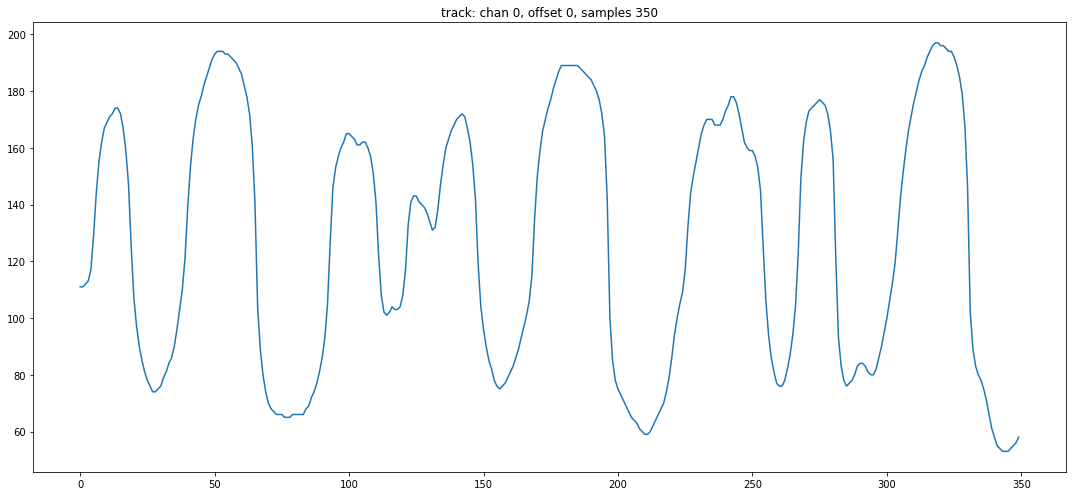

In [12]:
track_i = viz.plot_random_track(ds_train)
track, *_ = ds_train[track_i]
ipd.Audio(audio.mu_expand(track.squeeze().numpy(), p), rate=p.sampling_rate)

In [13]:
%%capture
utils.seed(p)
t.train()

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warn

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warn

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warn

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warn

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warn

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warn

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warn

In [14]:
utils.seed(p)
tracks, logits, g = sample.fast(m, ds_train.transforms, utils.decode_nucleus(), n_samples=32000, batch_size=10)

In [15]:
for track in tracks:
    track = ds_train.transforms.normalise(track.numpy())
    track = audio.mu_expand(track, p)
    ipd.display(ipd.Audio(track, rate=p.sampling_rate))

In [16]:
t.metrics.finish()

wandb: ERROR Control-C detected -- Run data was not synced
